<a href="https://colab.research.google.com/github/Naumanx123/NA/blob/main/Myntra_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
products = pd.read_excel("true.xlsx", sheet_name="dim_products")
products

,Product ID,Category,Sub-category,Product Name,Brand Name,Size,Color,Ratings
0,P0001,Women,Topwear,T-Shirts,Roadster,40,Black,4
1,P0002,Women,Topwear,T-Shirts,Roadster,40,Blue,5
2,P0003,Women,Topwear,T-Shirts,Roadster,42,White,3
3,P0004,Women,Topwear,T-Shirts,Roadster,44,Green,2
4,P0005,Women,Topwear,T-Shirts,Puma,38,Olive,5
...,...,...,...,...,...,...,...,...
3066,P3067,Kids,Footwear,Sandals,Campus,9-12M,Olive,5
3067,P3068,Kids,Footwear,Sandals,Campus,9-12M,Teal,3
3068,P3069,Kids,Footwear,Sandals,Campus,3-6M,Sea Green,5
3069,P3070,Kids,Footwear,Sandals,Campus,3-6M,Turquoise Blue,5


<ipython-input-62-b19a82180ec5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(products, x='Ratings', y='Category', inner='box', palette='Dark2')


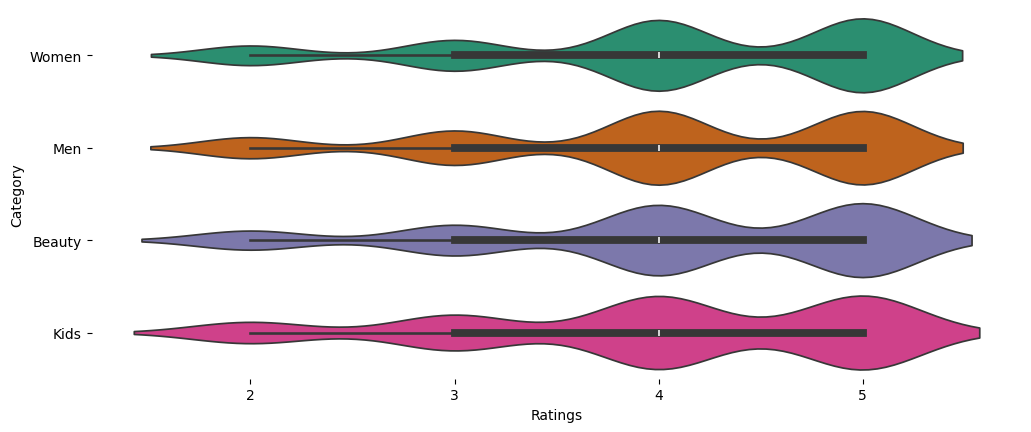

In [62]:
# @title Category vs Ratings

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(products['Category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(products, x='Ratings', y='Category', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

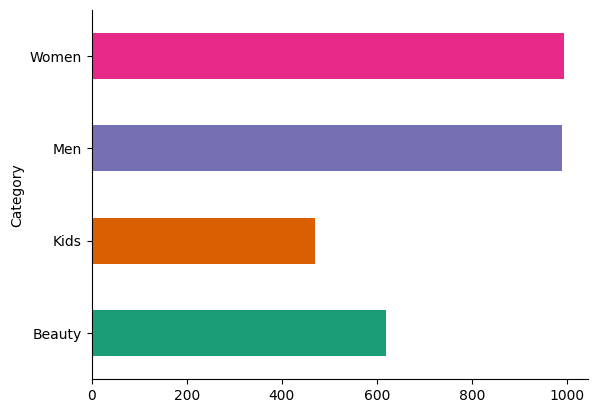

In [61]:
# @title Category

from matplotlib import pyplot as plt
import seaborn as sns
products.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [60]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=products)

https://docs.google.com/spreadsheets/d/1pSjIp2bvvdn5W-08RxSTy6zA09RJovlFWMczgLaJuEI#gid=0


In [5]:
customers = pd.read_excel("true.xlsx", sheet_name="dim_customers")
customers

,Customer ID,Customer Age,City,State
0,C001,30,Mumbai,Maharashtra
1,C002,35,Mumbai,Maharashtra
2,C003,36,Mumbai,Maharashtra
3,C004,40,Pune,Maharashtra
4,C005,25,Pune,Maharashtra
...,...,...,...,...
95,C096,36,Jodhpur,Rajasthan
96,C097,37,Jodhpur,Rajasthan
97,C098,38,Udaipur,Rajasthan
98,C099,39,Udaipur,Rajasthan


In [9]:
products.info()
customers.info()
orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3071 entries, 0 to 3070
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product ID    3071 non-null   object
 1   Category      3071 non-null   object
 2   Sub-category  3071 non-null   object
 3   Product Name  3071 non-null   object
 4   Brand Name    3071 non-null   object
 5   Size          3071 non-null   object
 6   Color         3071 non-null   object
 7   Ratings       3071 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 192.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Customer ID   100 non-null    object
 1   Customer Age  100 non-null    int64 
 2   City          100 non-null    object
 3   State         100 non-null    object
dtypes: int64(1), object(3)
memory usage: 3.3+ KB
<class 'pandas.co

In [11]:
orders = pd.read_excel("true.xlsx", sheet_name="fact_orders")
orders

,Order ID,Customer ID,Product ID,Date,Original Price,Discount%
0,OD0001,C001,P0001,2021-05-20,349,0.30
1,OD0002,C002,P0001,2021-01-19,350,0.30
2,OD0003,C003,P0001,2021-10-28,351,0.30
3,OD0004,C004,P0001,2021-05-20,352,0.25
4,OD0005,C005,P0001,2022-11-08,353,0.25
...,...,...,...,...,...,...
3495,OD3496,C081,P3071,2023-01-01,685,0.50
3496,OD3497,C082,P3071,2022-07-08,707,0.50
3497,OD3498,C083,P3071,2021-02-06,1819,0.50
3498,OD3499,C084,P3071,2021-07-18,856,0.50


In [12]:
orders.describe()

,Date,Original Price,Discount%
count,3500,3500.000000,3500.000000
mean,2022-02-15 04:32:46.628571392,843.840000,0.355146
min,2021-01-01 00:00:00,123.000000,0.100000
25%,2021-07-23 00:00:00,456.000000,0.300000
50%,2022-02-19 00:00:00,634.000000,0.350000
75%,2022-09-06 00:00:00,1119.000000,0.420000
max,2023-03-31 00:00:00,22365.000000,0.550000
std,NaN,689.706016,0.100804


In [16]:
#check_for_Duplicates
products.duplicated().sum()
customers.duplicated().sum()
orders.duplicated().sum()

0

In [17]:
products.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
3066,False
3067,False
3068,False
3069,False


In [19]:
products.drop_duplicates()

,Product ID,Category,Sub-category,Product Name,Brand Name,Size,Color,Ratings
0,P0001,Women,Topwear,T-Shirts,Roadster,40,Black,4
1,P0002,Women,Topwear,T-Shirts,Roadster,40,Blue,5
2,P0003,Women,Topwear,T-Shirts,Roadster,42,White,3
3,P0004,Women,Topwear,T-Shirts,Roadster,44,Green,2
4,P0005,Women,Topwear,T-Shirts,Puma,38,Olive,5
...,...,...,...,...,...,...,...,...
3066,P3067,Kids,Footwear,Sandals,Campus,9-12M,Olive,5
3067,P3068,Kids,Footwear,Sandals,Campus,9-12M,Teal,3
3068,P3069,Kids,Footwear,Sandals,Campus,3-6M,Sea Green,5
3069,P3070,Kids,Footwear,Sandals,Campus,3-6M,Turquoise Blue,5


In [22]:
orders["Month"] = orders["Date"].dt.strftime("%B")
orders

,Order ID,Customer ID,Product ID,Date,Original Price,Discount%,Month
0,OD0001,C001,P0001,2021-05-20,349,0.30,May
1,OD0002,C002,P0001,2021-01-19,350,0.30,January
2,OD0003,C003,P0001,2021-10-28,351,0.30,October
3,OD0004,C004,P0001,2021-05-20,352,0.25,May
4,OD0005,C005,P0001,2022-11-08,353,0.25,November
...,...,...,...,...,...,...,...
3495,OD3496,C081,P3071,2023-01-01,685,0.50,January
3496,OD3497,C082,P3071,2022-07-08,707,0.50,July
3497,OD3498,C083,P3071,2021-02-06,1819,0.50,February
3498,OD3499,C084,P3071,2021-07-18,856,0.50,July


In [34]:
orders["Total Price"] = orders['Original Price'] - (orders['Original Price'] * orders['Discount%'])
orders




0

In [36]:
gb = orders.groupby("Month").agg({"Total Price":"sum"})
gb

,Total Price
Month,
April,123333.24
August,151195.18
December,149565.59
February,202941.95
January,232189.61
July,137832.60
June,140366.13
March,211853.22
May,156812.99


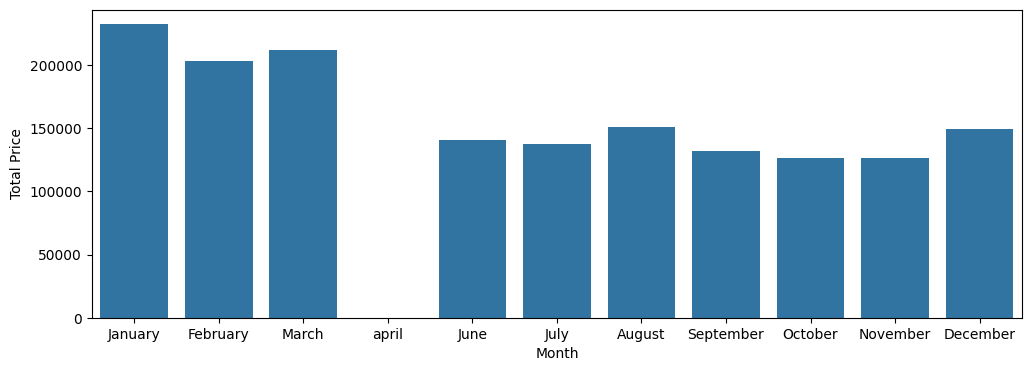

In [42]:
plt.figure(figsize=(12,4))
sns.barplot(x=gb.index, y=gb["Total Price"], order=["January","February","March","april","June","July","August","September", "October", "November", "December"])
plt.show()

In [46]:
df=pd.merge(left=orders, right=products,on ="Product ID", how="inner")
df

,Order ID,Customer ID,Product ID,Date,Original Price,Discount%,Month,Total Price,Category,Sub-category,Product Name,Brand Name,Size,Color,Ratings
0,OD0001,C001,P0001,2021-05-20,349,0.30,May,244.30,Women,Topwear,T-Shirts,Roadster,40,Black,4
1,OD0002,C002,P0001,2021-01-19,350,0.30,January,245.00,Women,Topwear,T-Shirts,Roadster,40,Black,4
2,OD0003,C003,P0001,2021-10-28,351,0.30,October,245.70,Women,Topwear,T-Shirts,Roadster,40,Black,4
3,OD0004,C004,P0001,2021-05-20,352,0.25,May,264.00,Women,Topwear,T-Shirts,Roadster,40,Black,4
4,OD0005,C005,P0001,2022-11-08,353,0.25,November,264.75,Women,Topwear,T-Shirts,Roadster,40,Black,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,OD3496,C081,P3071,2023-01-01,685,0.50,January,342.50,Kids,Footwear,Sandals,Campus,3-6M,Charcoal,4
3496,OD3497,C082,P3071,2022-07-08,707,0.50,July,353.50,Kids,Footwear,Sandals,Campus,3-6M,Charcoal,4
3497,OD3498,C083,P3071,2021-02-06,1819,0.50,February,909.50,Kids,Footwear,Sandals,Campus,3-6M,Charcoal,4
3498,OD3499,C084,P3071,2021-07-18,856,0.50,July,428.00,Kids,Footwear,Sandals,Campus,3-6M,Charcoal,4


In [48]:
gb1=df.groupby("Category").agg({"Total Price":"sum"})
gb1

,Total Price
Category,
Beauty,312016.36
Kids,445682.43
Men,586456.23
Women,546934.66


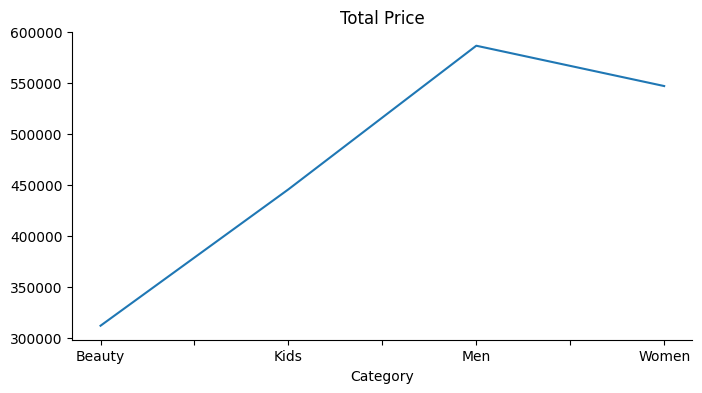

In [55]:
# @title Total Price

from matplotlib import pyplot as plt
gb1['Total Price'].plot(kind='line', figsize=(8, 4), title='Total Price')
plt.gca().spines[['top', 'right']].set_visible(False)

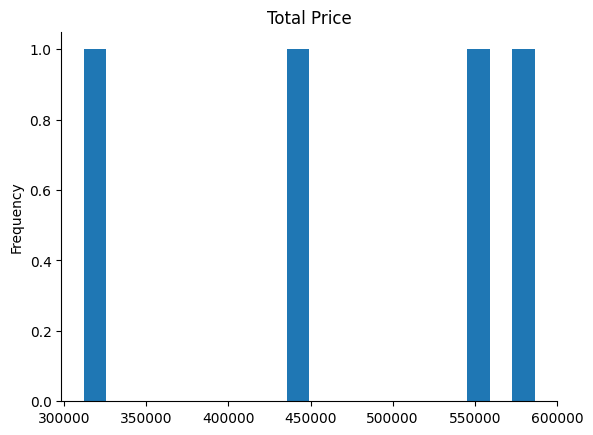

In [54]:
# @title Total Price

from matplotlib import pyplot as plt
gb1['Total Price'].plot(kind='hist', bins=20, title='Total Price')
plt.gca().spines[['top', 'right',]].set_visible(False)

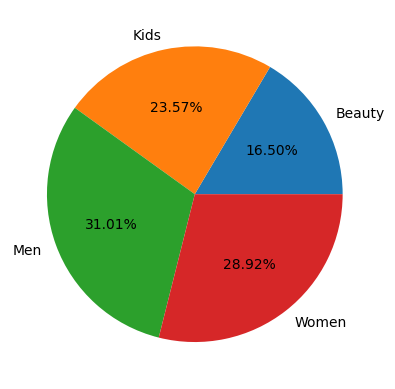

In [53]:
plt.pie(gb1["Total Price"], labels=gb1.index, autopct="%0.2f%%")
plt.show()

In [58]:
df["Total Price"].sum()


1891089.6800000002